In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Librerías Utilizadas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder


##Análisis preliminar de Datos

In [ ]:
DATA_CRUDA = pd.read_csv('/content/drive/MyDrive/AG_PREDICTIVA/TALLER_FINAL/BASE_DATOS_CACAO.csv')
print("CSV file loaded successfully!")
display(DATA_CRUDA.head())


CSV file loaded successfully!


,aptitud,area/ha,Latitude,Longitude,Altitude,ALLSKY_SFC_SW_DWN,average_PRECTOTCORR,average_CLRSKY_SFC_PAR_TOT,average_RH2M,average_WS2M,average_T2M_MAX,average_T2M_MIN,std_ALLSKY_SFC_SW_DWN,std_PRECTOTCORR,std_CLRSKY_SFC_PAR_TOT,std_RH2M,std_WS2M,std_T2M_MAX,std_T2M_MIN
0,Aptitud baja,3706.934378,5.154653,-69.666551,100,17.601123,5.261562,131.421425,80.300329,1.425507,30.984082,23.488712,3.981537,11.685414,5.782457,10.202405,0.637157,2.647880,1.086915
1,Aptitud alta,3014.850845,4.464944,-72.984759,198,17.200110,9.143370,130.990411,82.877260,0.277945,28.114986,20.569260,4.344763,12.425268,5.521861,9.888504,0.064304,2.270211,1.194326
2,Aptitud alta,112.886541,3.323448,-76.630246,1584,15.160438,6.808192,132.146356,87.049233,1.789507,26.417973,20.465753,2.256724,9.620349,4.812734,4.054702,0.290761,1.658143,0.587133
3,Aptitud media,940.593551,0.829496,-74.599975,219,15.597671,5.483178,129.804685,89.330082,0.110986,28.821863,22.650411,4.092652,5.912668,7.413660,3.965369,0.053786,1.431211,0.832373
4,Aptitud media,2260.721999,1.015217,-74.699908,213,15.958493,5.752055,130.146849,90.649671,0.141562,28.389753,22.580740,4.278833,5.573879,6.961290,3.206343,0.057048,1.319239,0.904852


In [ ]:
DATA_CRUDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288290 entries, 0 to 288289
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   aptitud                     288290 non-null  object 
 1   area/ha                     288290 non-null  float64
 2   Latitude                    288290 non-null  float64
 3   Longitude                   288290 non-null  float64
 4   Altitude                    288290 non-null  int64  
 5   ALLSKY_SFC_SW_DWN           288290 non-null  float64
 6   average_PRECTOTCORR         288290 non-null  float64
 7   average_CLRSKY_SFC_PAR_TOT  288290 non-null  float64
 8   average_RH2M                288290 non-null  float64
 9   average_WS2M                288290 non-null  float64
 10  average_T2M_MAX             288290 non-null  float64
 11  average_T2M_MIN             288290 non-null  float64
 12  std_ALLSKY_SFC_SW_DWN       288290 non-null  float64
 13  std_PRECTOTCOR

In [ ]:
DATA = DATA_CRUDA.drop(['area/ha', 'Latitude', 'Longitude'], axis=1)
print("New DataFrame 'DATA' created successfully!")
display(DATA.head())

New DataFrame 'DATA' created successfully!


,aptitud,Altitude,ALLSKY_SFC_SW_DWN,average_PRECTOTCORR,average_CLRSKY_SFC_PAR_TOT,average_RH2M,average_WS2M,average_T2M_MAX,average_T2M_MIN,std_ALLSKY_SFC_SW_DWN,std_PRECTOTCORR,std_CLRSKY_SFC_PAR_TOT,std_RH2M,std_WS2M,std_T2M_MAX,std_T2M_MIN
0,Aptitud baja,100,17.601123,5.261562,131.421425,80.300329,1.425507,30.984082,23.488712,3.981537,11.685414,5.782457,10.202405,0.637157,2.647880,1.086915
1,Aptitud alta,198,17.200110,9.143370,130.990411,82.877260,0.277945,28.114986,20.569260,4.344763,12.425268,5.521861,9.888504,0.064304,2.270211,1.194326
2,Aptitud alta,1584,15.160438,6.808192,132.146356,87.049233,1.789507,26.417973,20.465753,2.256724,9.620349,4.812734,4.054702,0.290761,1.658143,0.587133
3,Aptitud media,219,15.597671,5.483178,129.804685,89.330082,0.110986,28.821863,22.650411,4.092652,5.912668,7.413660,3.965369,0.053786,1.431211,0.832373
4,Aptitud media,213,15.958493,5.752055,130.146849,90.649671,0.141562,28.389753,22.580740,4.278833,5.573879,6.961290,3.206343,0.057048,1.319239,0.904852


In [ ]:
DATA.describe()

,Altitude,ALLSKY_SFC_SW_DWN,average_PRECTOTCORR,average_CLRSKY_SFC_PAR_TOT,average_RH2M,average_WS2M,average_T2M_MAX,average_T2M_MIN,std_ALLSKY_SFC_SW_DWN,std_PRECTOTCORR,std_CLRSKY_SFC_PAR_TOT,std_RH2M,std_WS2M,std_T2M_MAX,std_T2M_MIN
count,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000
mean,550.019383,17.200724,5.001923,132.912048,80.086689,0.816805,28.179613,20.030772,3.529266,7.783415,6.473048,7.102347,0.276112,1.994329,1.060781
std,486.750192,1.386602,2.728834,1.837216,7.979418,0.636114,3.974912,3.690929,0.563623,4.004431,1.568585,3.229375,0.254246,0.624259,0.204846
min,-1.000000,12.950274,0.360219,128.716082,50.420685,0.022164,17.251973,7.663288,2.023583,0.857297,3.982443,2.369409,0.012247,0.777234,0.559874
25%,150.000000,16.190712,3.138415,131.501448,75.512986,0.195425,24.401589,16.200164,2.986854,5.367656,5.345866,4.665518,0.057489,1.498849,0.910712
50%,301.000000,17.110110,4.489260,133.129563,82.151585,0.723890,28.612137,21.684849,3.530884,6.746089,5.972783,6.158468,0.184805,1.853240,1.046714
75%,946.000000,18.231507,6.421175,134.378219,86.834344,1.402022,31.188521,22.905534,4.053471,9.606335,7.417063,8.987179,0.476083,2.494569,1.164129
max,3417.000000,21.420767,25.074055,137.076411,93.931479,6.611205,37.918740,27.692438,5.304667,53.560375,10.826430,17.827942,2.166642,4.050231,1.960220


In [ ]:
# Change the values -1 and 0 to 1 in the 'Altitude' column
DATA.loc[(DATA['Altitude'] == -1) | (DATA['Altitude'] == 0), 'Altitude'] = 1

print("DataFrame after changing Altitude -1 and 0 to 1:")
display(DATA[(DATA['Altitude'] == -1) | (DATA['Altitude'] == 0)]) # Display rows that should have been changed (should be empty)

DataFrame after changing Altitude -1 and 0 to 1:


,aptitud,Altitude,ALLSKY_SFC_SW_DWN,average_PRECTOTCORR,average_CLRSKY_SFC_PAR_TOT,average_RH2M,average_WS2M,average_T2M_MAX,average_T2M_MIN,std_ALLSKY_SFC_SW_DWN,std_PRECTOTCORR,std_CLRSKY_SFC_PAR_TOT,std_RH2M,std_WS2M,std_T2M_MAX,std_T2M_MIN


In [ ]:
DATA.describe()

,Altitude,ALLSKY_SFC_SW_DWN,average_PRECTOTCORR,average_CLRSKY_SFC_PAR_TOT,average_RH2M,average_WS2M,average_T2M_MAX,average_T2M_MIN,std_ALLSKY_SFC_SW_DWN,std_PRECTOTCORR,std_CLRSKY_SFC_PAR_TOT,std_RH2M,std_WS2M,std_T2M_MAX,std_T2M_MIN
count,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000
mean,550.019401,17.200724,5.001923,132.912048,80.086689,0.816805,28.179613,20.030772,3.529266,7.783415,6.473048,7.102347,0.276112,1.994329,1.060781
std,486.750172,1.386602,2.728834,1.837216,7.979418,0.636114,3.974912,3.690929,0.563623,4.004431,1.568585,3.229375,0.254246,0.624259,0.204846
min,1.000000,12.950274,0.360219,128.716082,50.420685,0.022164,17.251973,7.663288,2.023583,0.857297,3.982443,2.369409,0.012247,0.777234,0.559874
25%,150.000000,16.190712,3.138415,131.501448,75.512986,0.195425,24.401589,16.200164,2.986854,5.367656,5.345866,4.665518,0.057489,1.498849,0.910712
50%,301.000000,17.110110,4.489260,133.129563,82.151585,0.723890,28.612137,21.684849,3.530884,6.746089,5.972783,6.158468,0.184805,1.853240,1.046714
75%,946.000000,18.231507,6.421175,134.378219,86.834344,1.402022,31.188521,22.905534,4.053471,9.606335,7.417063,8.987179,0.476083,2.494569,1.164129
max,3417.000000,21.420767,25.074055,137.076411,93.931479,6.611205,37.918740,27.692438,5.304667,53.560375,10.826430,17.827942,2.166642,4.050231,1.960220


In [ ]:
print(DATA['aptitud'].unique())

['Aptitud baja' 'Aptitud alta' 'Aptitud media']


In [ ]:
df = pd.get_dummies(DATA, columns=['aptitud'], prefix='aptitud')

In [ ]:
print(df.head())

   Altitude  ALLSKY_SFC_SW_DWN  average_PRECTOTCORR  \
0       100          17.601123             5.261562   
1       198          17.200110             9.143370   
2      1584          15.160438             6.808192   
3       219          15.597671             5.483178   
4       213          15.958493             5.752055   

   average_CLRSKY_SFC_PAR_TOT  average_RH2M  average_WS2M  average_T2M_MAX  \
0                  131.421425     80.300329      1.425507        30.984082   
1                  130.990411     82.877260      0.277945        28.114986   
2                  132.146356     87.049233      1.789507        26.417973   
3                  129.804685     89.330082      0.110986        28.821863   
4                  130.146849     90.649671      0.141562        28.389753   

   average_T2M_MIN  std_ALLSKY_SFC_SW_DWN  std_PRECTOTCORR  \
0        23.488712               3.981537        11.685414   
1        20.569260               4.344763        12.425268   
2        20.46

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288290 entries, 0 to 288289
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Altitude                    288290 non-null  int64  
 1   ALLSKY_SFC_SW_DWN           288290 non-null  float64
 2   average_PRECTOTCORR         288290 non-null  float64
 3   average_CLRSKY_SFC_PAR_TOT  288290 non-null  float64
 4   average_RH2M                288290 non-null  float64
 5   average_WS2M                288290 non-null  float64
 6   average_T2M_MAX             288290 non-null  float64
 7   average_T2M_MIN             288290 non-null  float64
 8   std_ALLSKY_SFC_SW_DWN       288290 non-null  float64
 9   std_PRECTOTCORR             288290 non-null  float64
 10  std_CLRSKY_SFC_PAR_TOT      288290 non-null  float64
 11  std_RH2M                    288290 non-null  float64
 12  std_WS2M                    288290 non-null  float64
 13  std_T2M_MAX   

In [ ]:
df_numerical = df.select_dtypes(include=np.number)
print("Numerical columns selected:")
print(df_numerical.columns)

Numerical columns selected:
Index(['Altitude', 'ALLSKY_SFC_SW_DWN', 'average_PRECTOTCORR',
       'average_CLRSKY_SFC_PAR_TOT', 'average_RH2M', 'average_WS2M',
       'average_T2M_MAX', 'average_T2M_MIN', 'std_ALLSKY_SFC_SW_DWN',
       'std_PRECTOTCORR', 'std_CLRSKY_SFC_PAR_TOT', 'std_RH2M', 'std_WS2M',
       'std_T2M_MAX', 'std_T2M_MIN'],
      dtype='object')


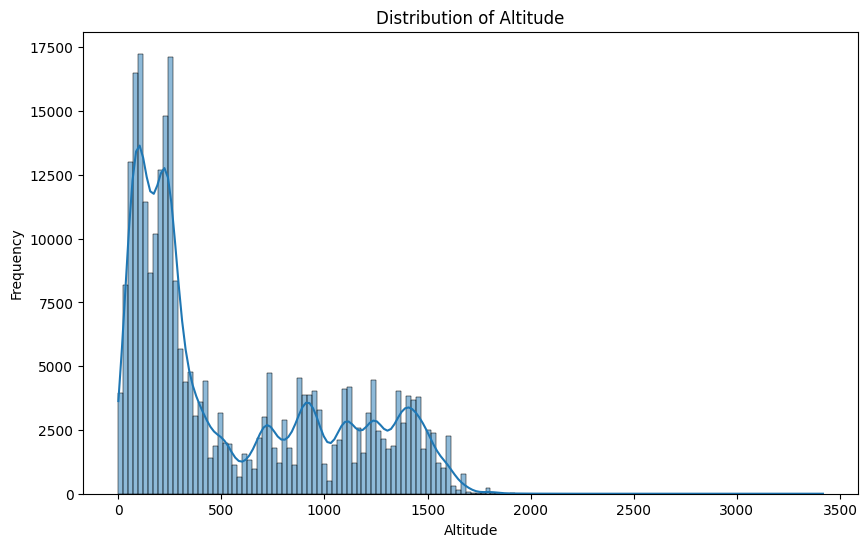

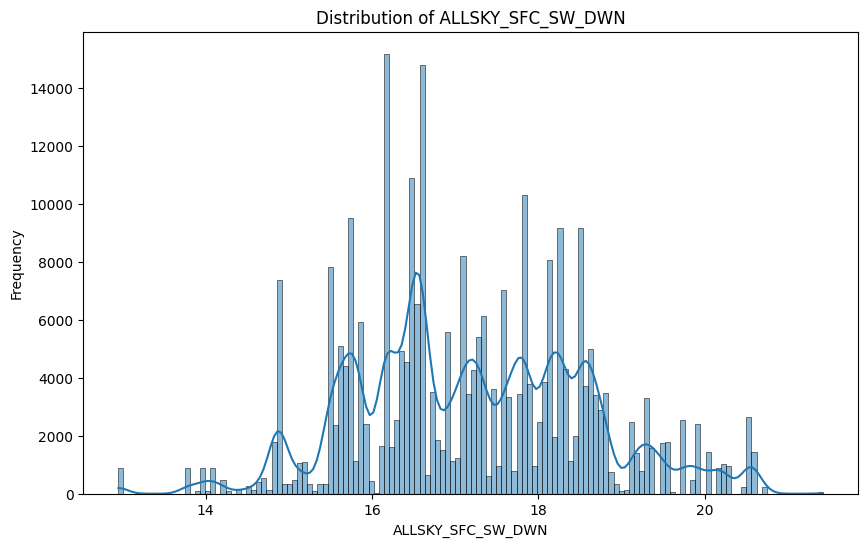

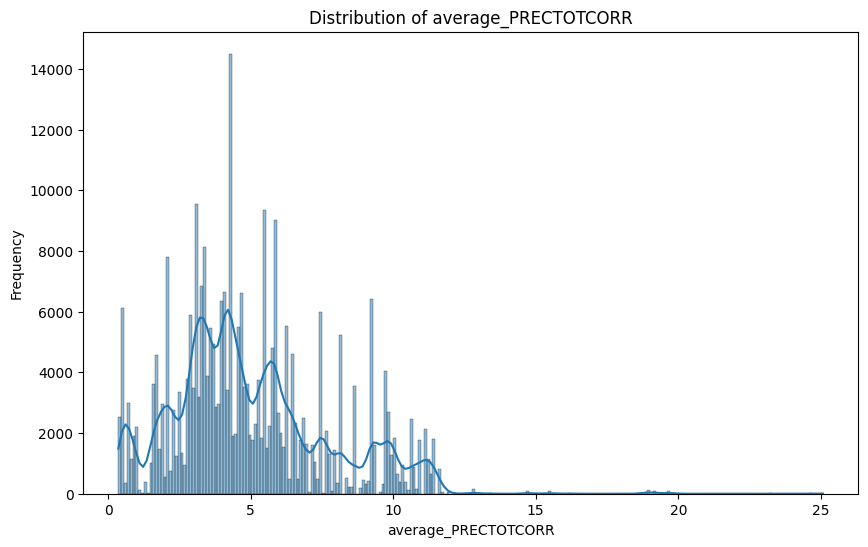

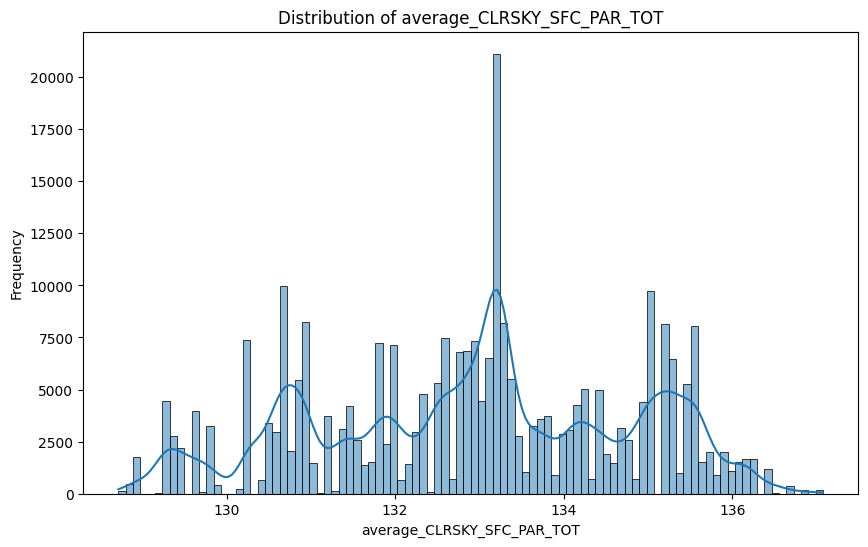

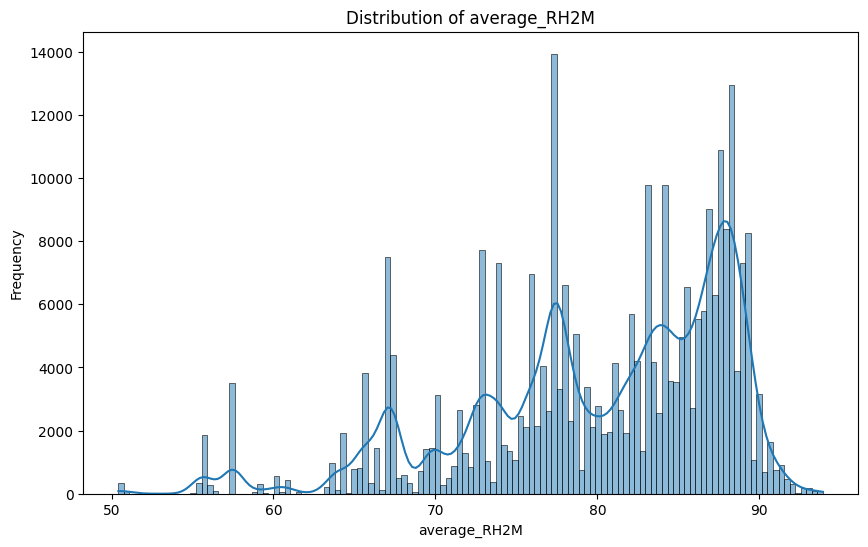

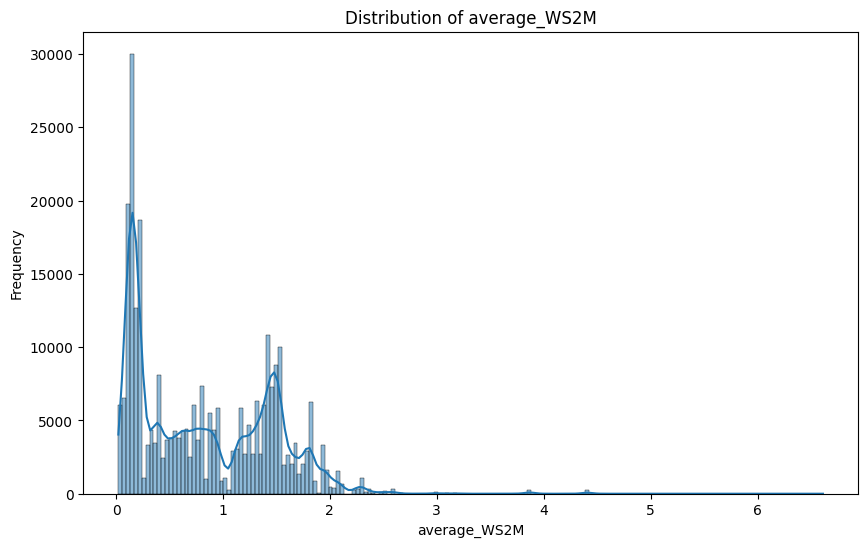

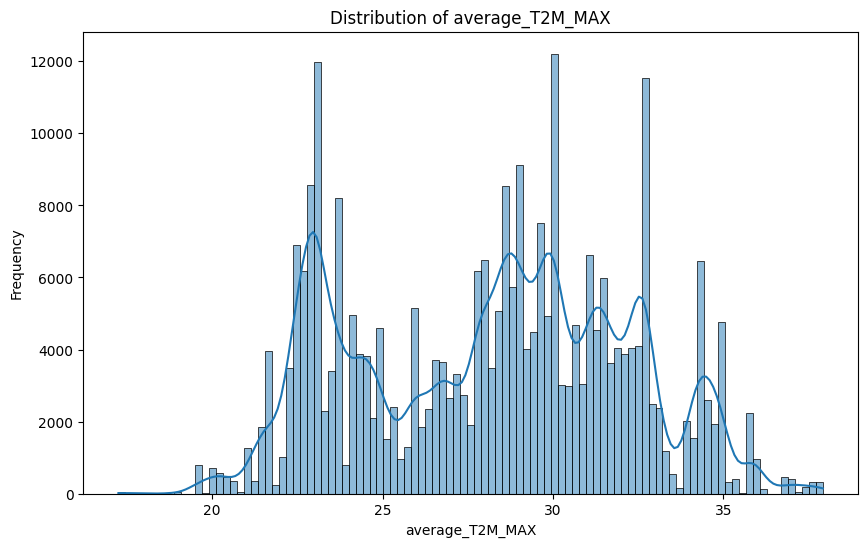

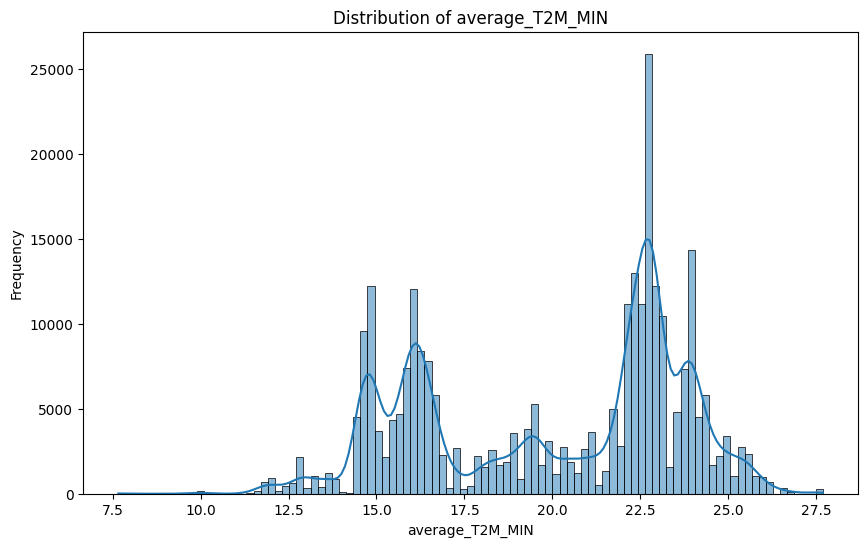

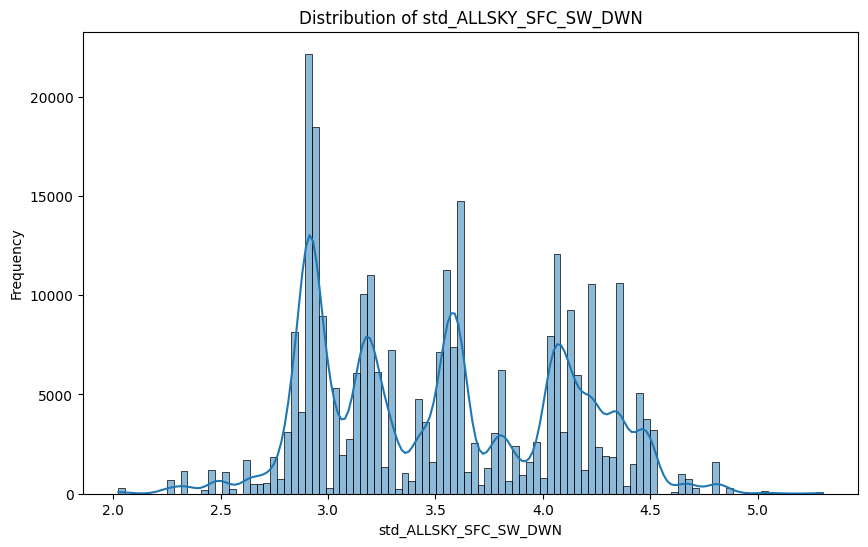

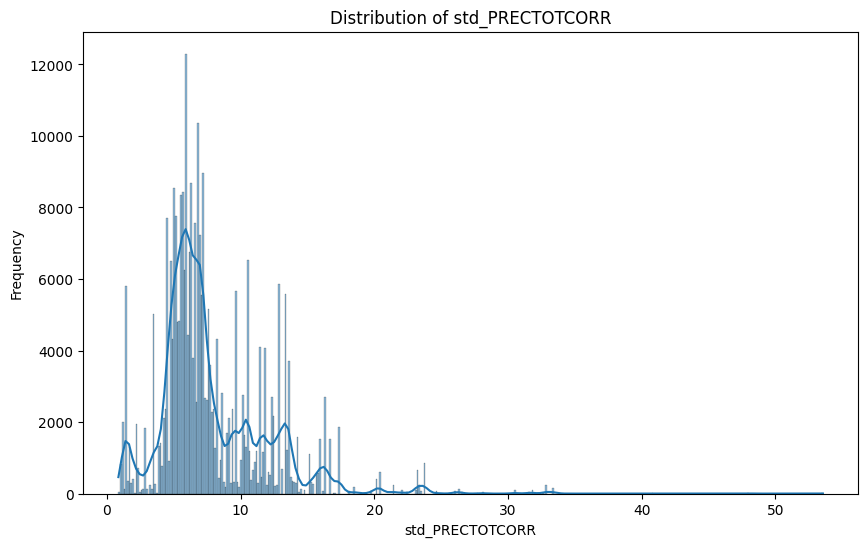

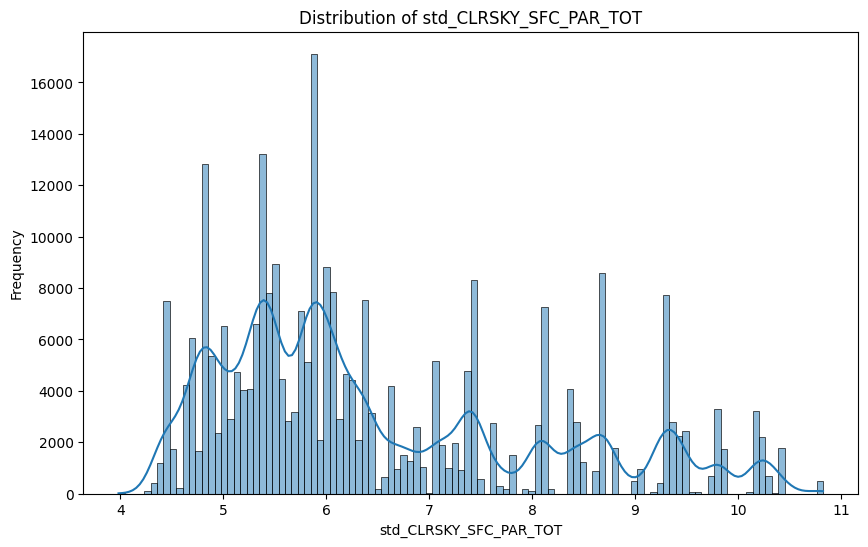

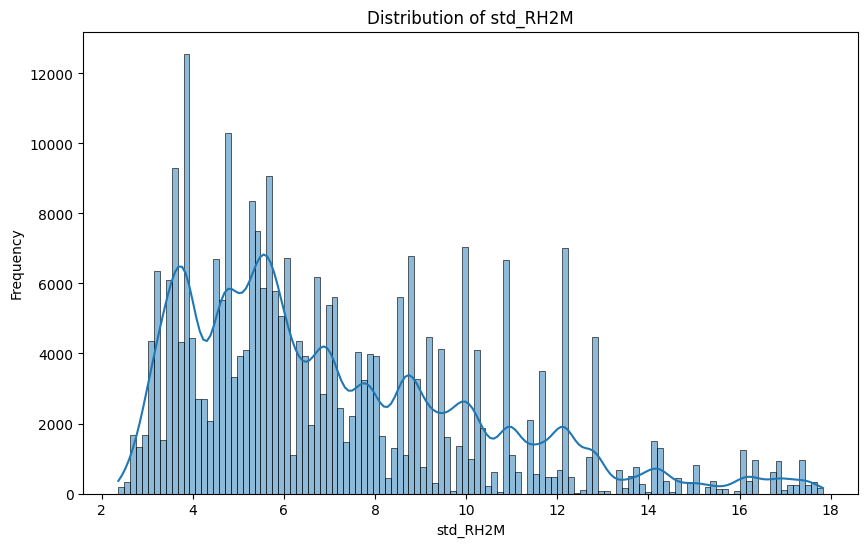

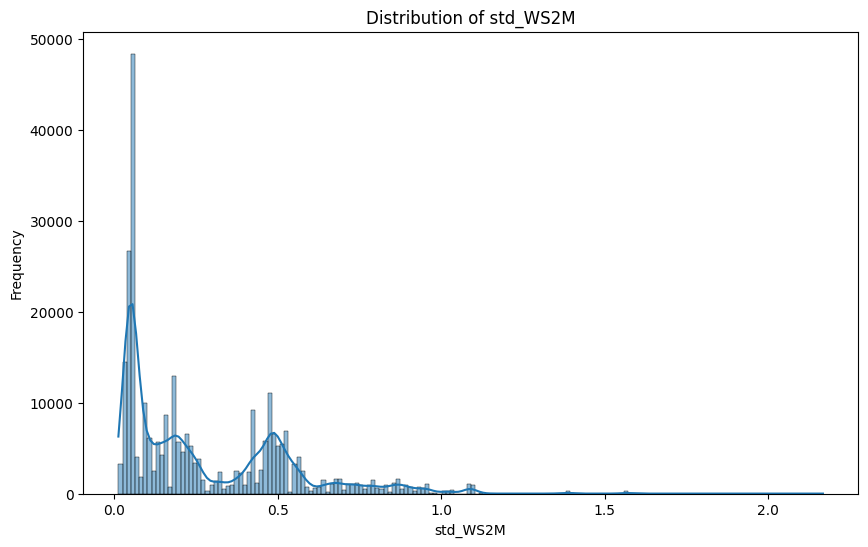

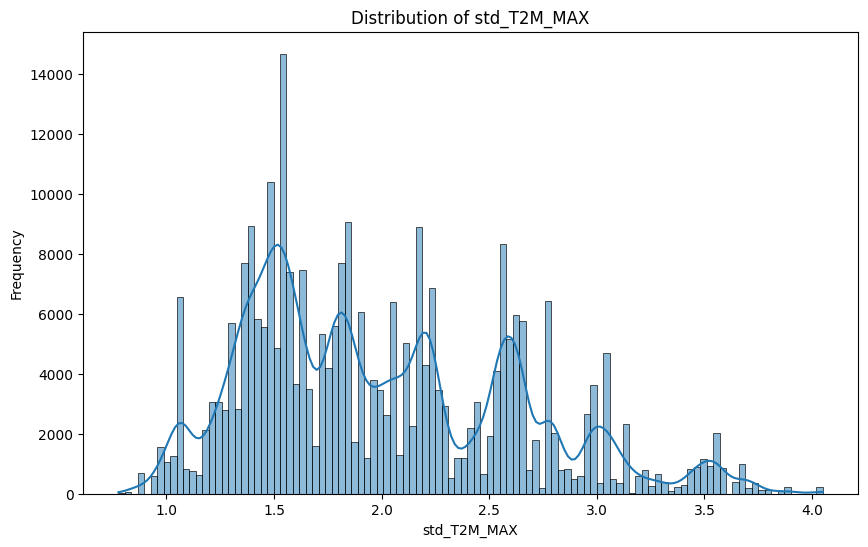

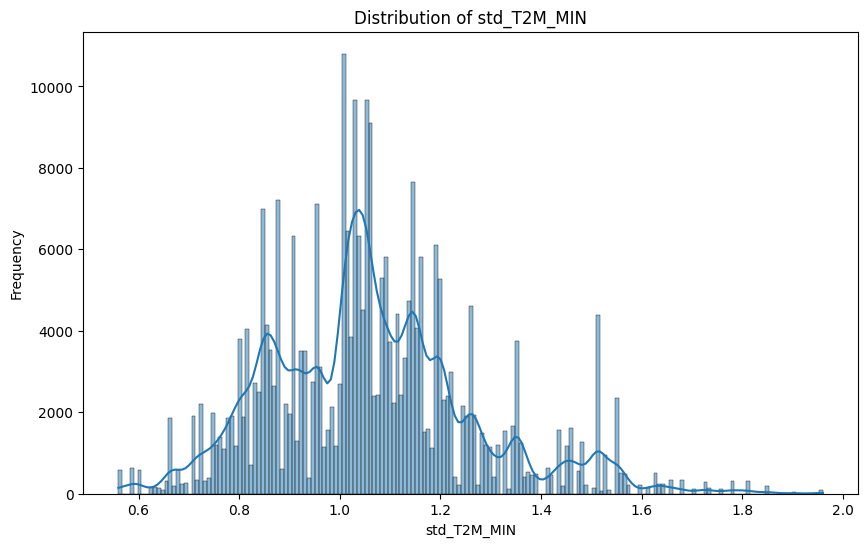

In [ ]:
for column in df_numerical.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_numerical, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

**Reasoning**:
Calculate the 1st and 99th percentiles for each numerical column and add annotations to the distribution plots to highlight potential outliers.



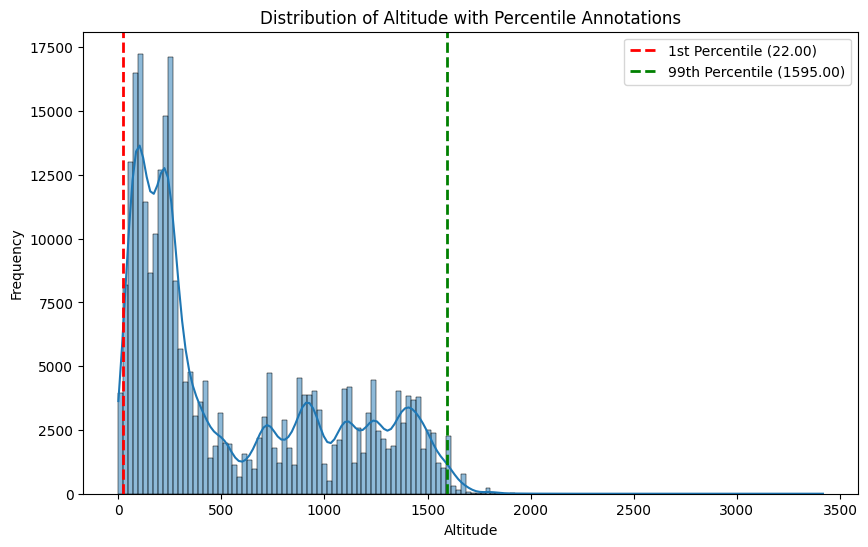

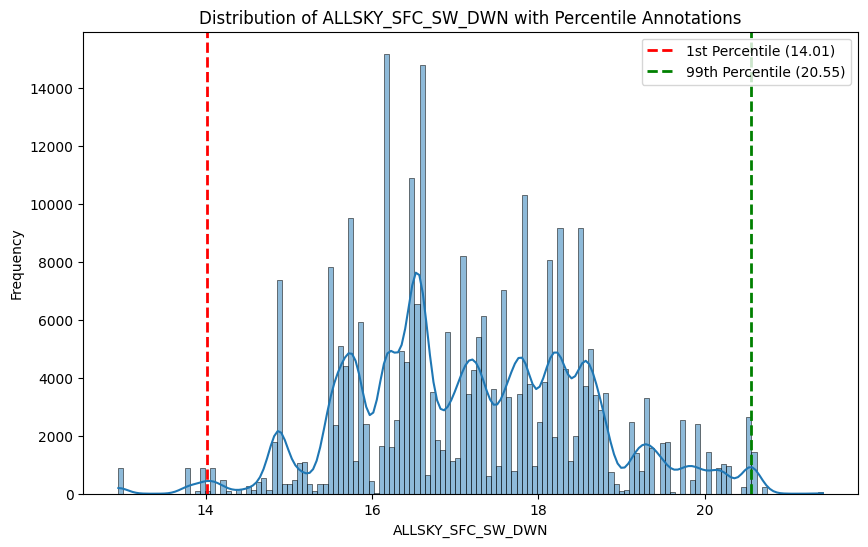

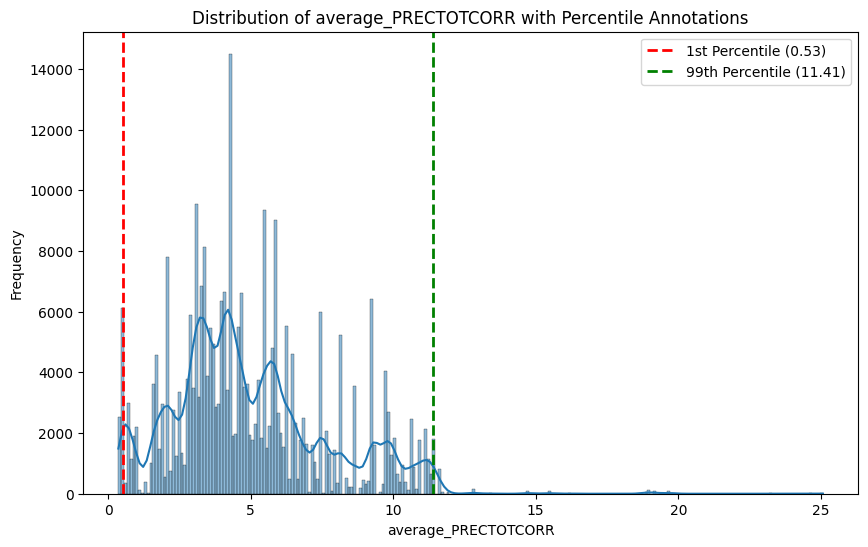

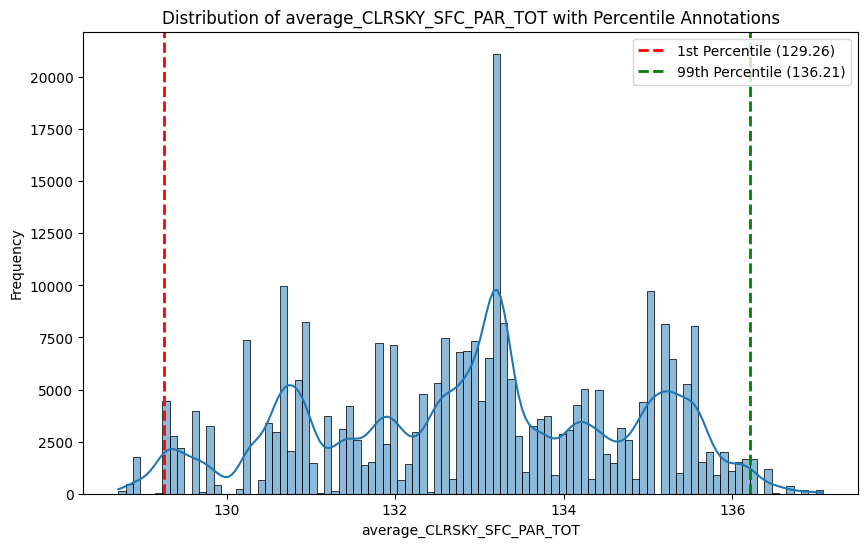

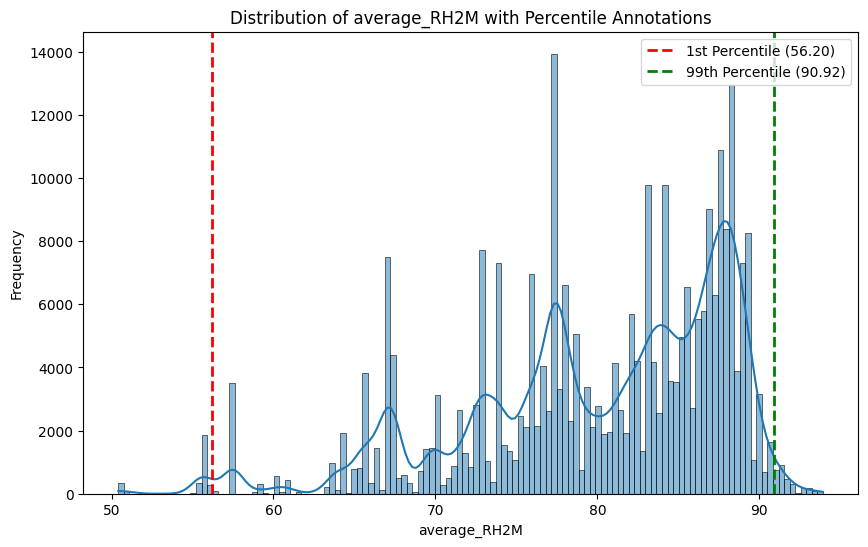

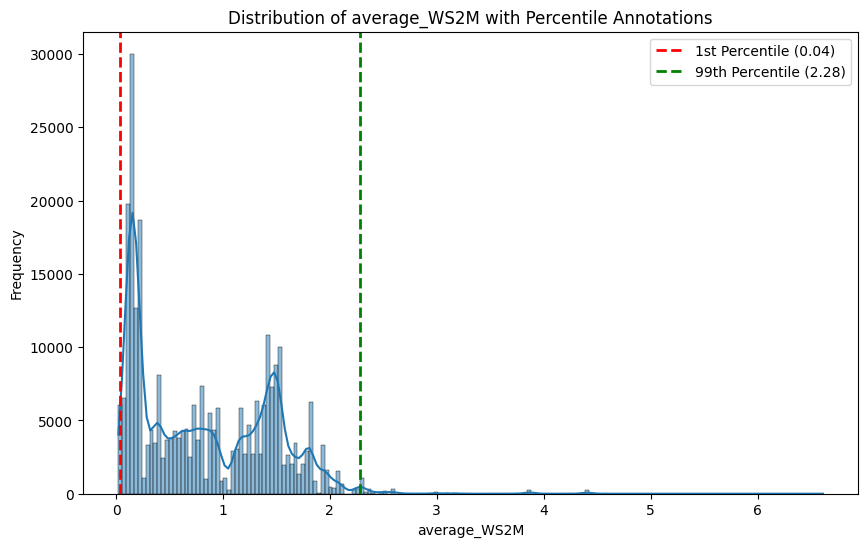

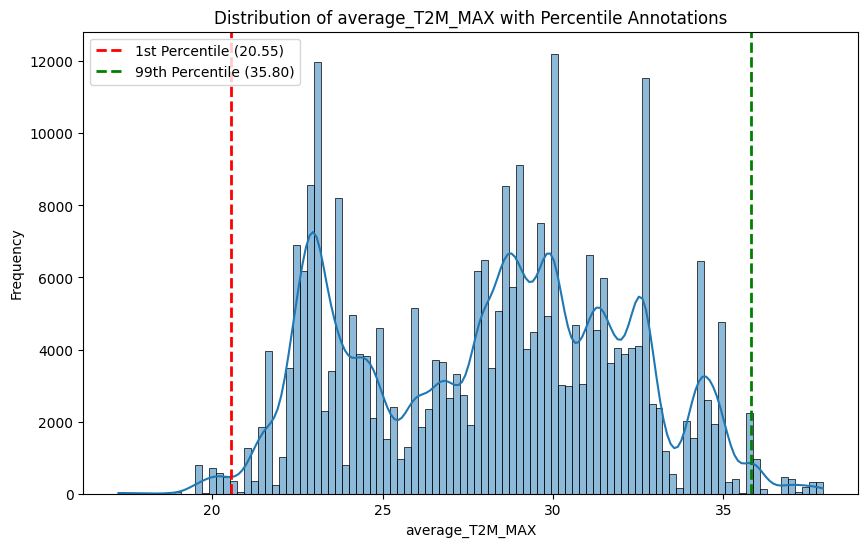

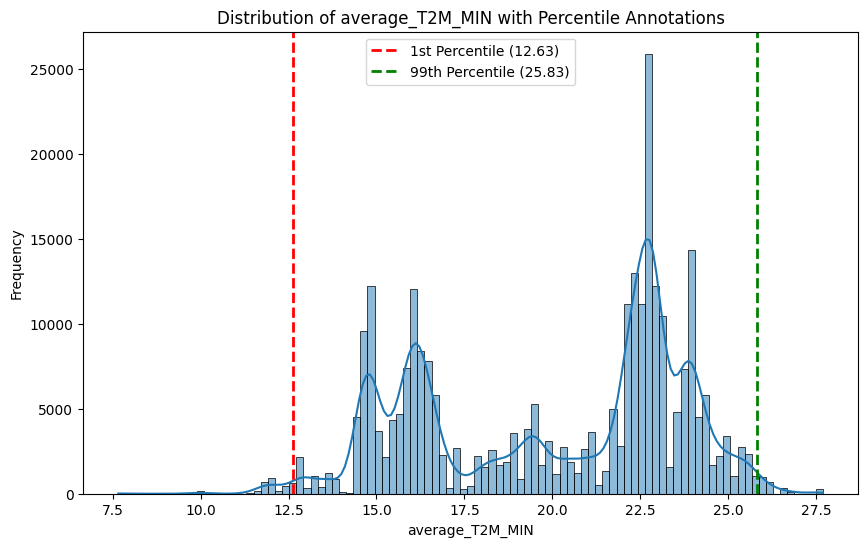

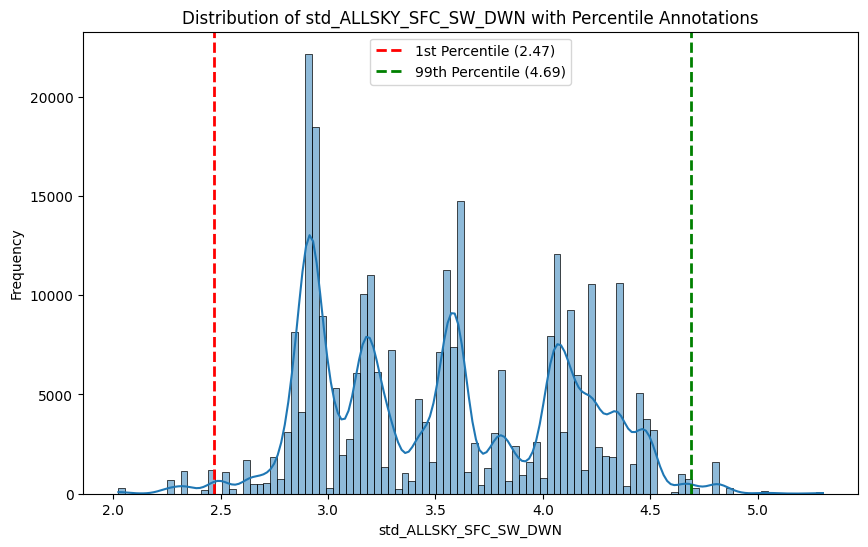

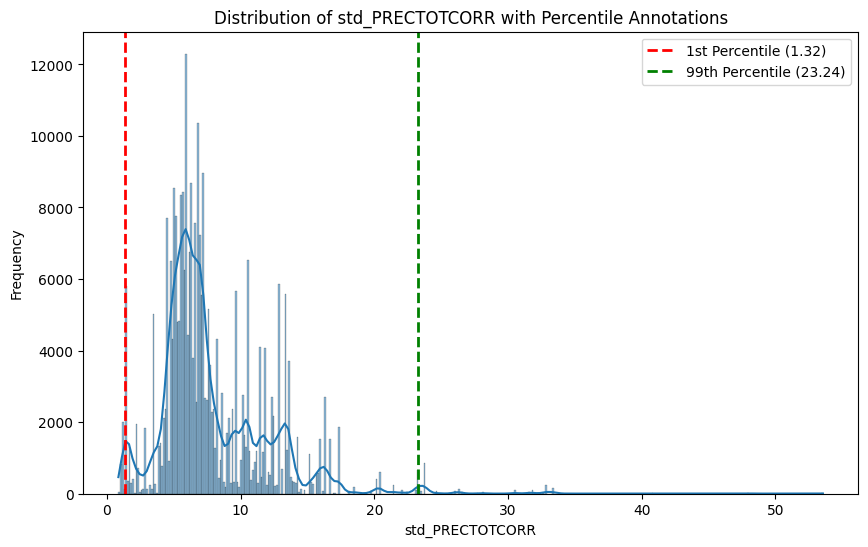

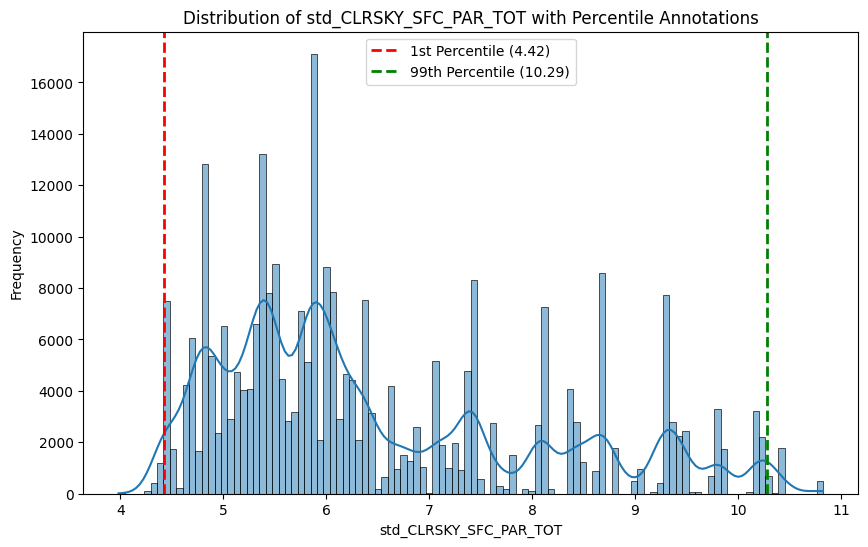

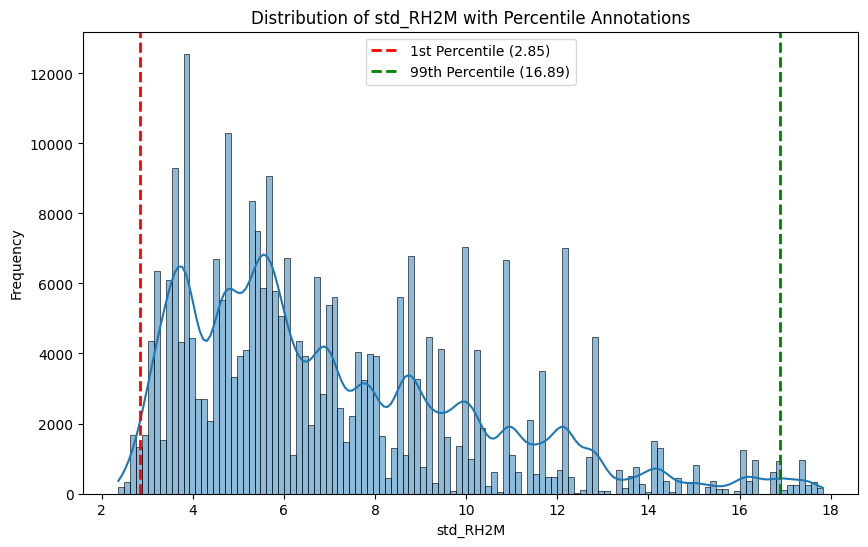

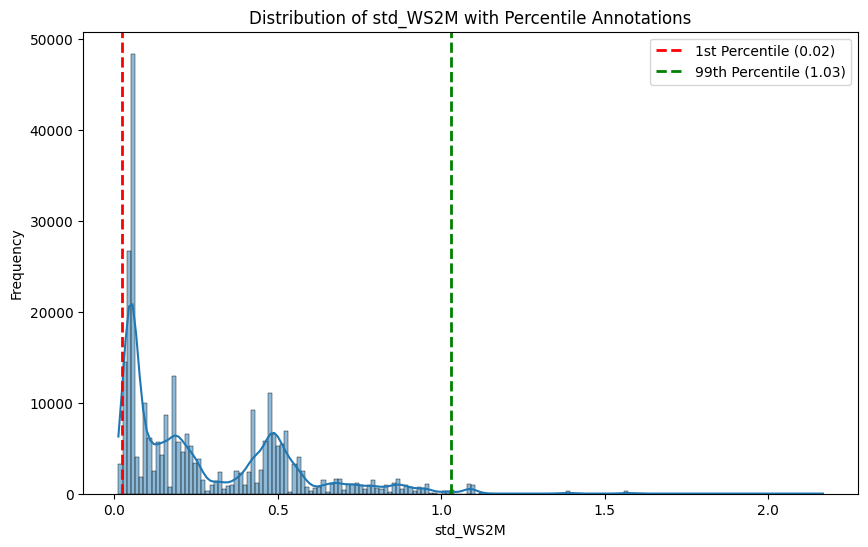

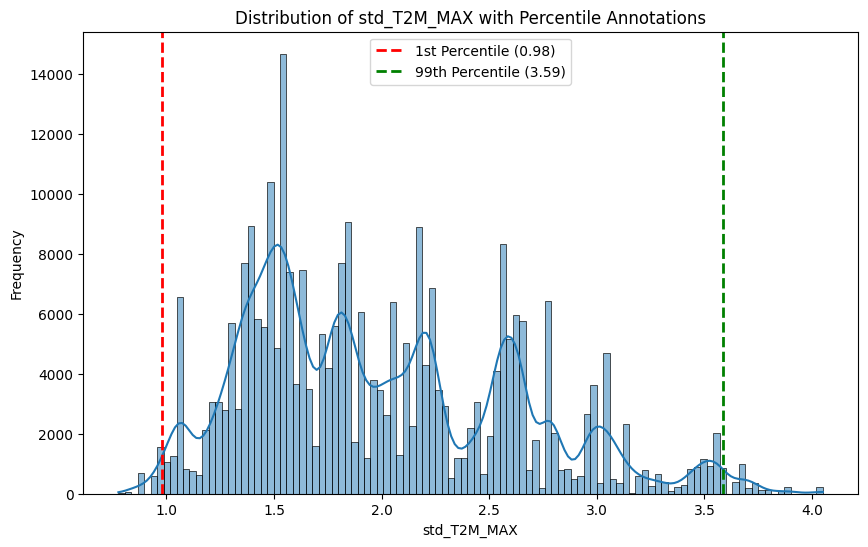

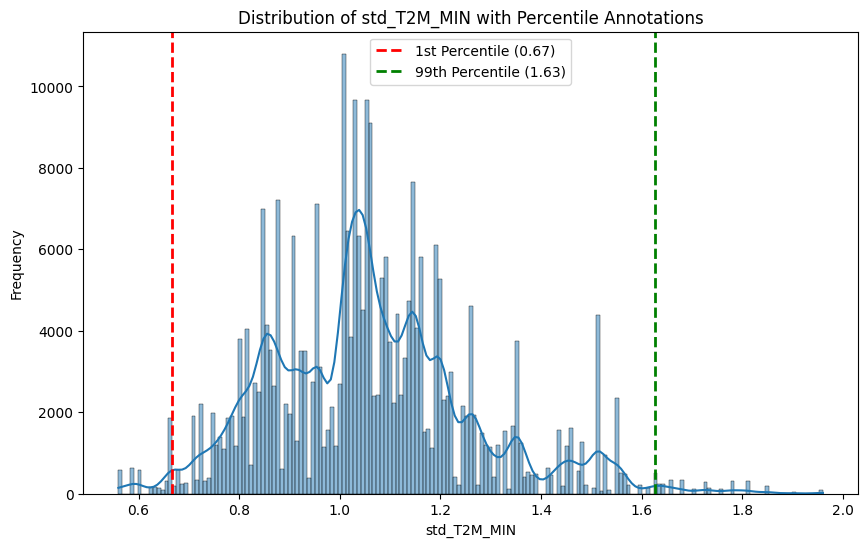

In [ ]:
for column in df_numerical.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_numerical, x=column, kde=True)
    plt.title(f'Distribution of {column} with Percentile Annotations')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    q1 = df_numerical[column].quantile(0.01)
    q99 = df_numerical[column].quantile(0.99)

    plt.axvline(q1, color='red', linestyle='dashed', linewidth=2, label=f'1st Percentile ({q1:.2f})')
    plt.axvline(q99, color='green', linestyle='dashed', linewidth=2, label=f'99th Percentile ({q99:.2f})')
    plt.legend()
    plt.show()

In [ ]:
df.describe()

,Altitude,ALLSKY_SFC_SW_DWN,average_PRECTOTCORR,average_CLRSKY_SFC_PAR_TOT,average_RH2M,average_WS2M,average_T2M_MAX,average_T2M_MIN,std_ALLSKY_SFC_SW_DWN,std_PRECTOTCORR,std_CLRSKY_SFC_PAR_TOT,std_RH2M,std_WS2M,std_T2M_MAX,std_T2M_MIN
count,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000,288290.000000
mean,550.019401,17.200724,5.001923,132.912048,80.086689,0.816805,28.179613,20.030772,3.529266,7.783415,6.473048,7.102347,0.276112,1.994329,1.060781
std,486.750172,1.386602,2.728834,1.837216,7.979418,0.636114,3.974912,3.690929,0.563623,4.004431,1.568585,3.229375,0.254246,0.624259,0.204846
min,1.000000,12.950274,0.360219,128.716082,50.420685,0.022164,17.251973,7.663288,2.023583,0.857297,3.982443,2.369409,0.012247,0.777234,0.559874
25%,150.000000,16.190712,3.138415,131.501448,75.512986,0.195425,24.401589,16.200164,2.986854,5.367656,5.345866,4.665518,0.057489,1.498849,0.910712
50%,301.000000,17.110110,4.489260,133.129563,82.151585,0.723890,28.612137,21.684849,3.530884,6.746089,5.972783,6.158468,0.184805,1.853240,1.046714
75%,946.000000,18.231507,6.421175,134.378219,86.834344,1.402022,31.188521,22.905534,4.053471,9.606335,7.417063,8.987179,0.476083,2.494569,1.164129
max,3417.000000,21.420767,25.074055,137.076411,93.931479,6.611205,37.918740,27.692438,5.304667,53.560375,10.826430,17.827942,2.166642,4.050231,1.960220


##Transformación de Datos

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the columns to scale (all numerical columns except the one-hot encoded ones)
columns_to_scale = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print("DataFrame 'df' after StandardScaler transformation:")
display(df.head())

DataFrame 'df' after StandardScaler transformation:


,Altitude,ALLSKY_SFC_SW_DWN,average_PRECTOTCORR,average_CLRSKY_SFC_PAR_TOT,average_RH2M,average_WS2M,average_T2M_MAX,average_T2M_MIN,std_ALLSKY_SFC_SW_DWN,std_PRECTOTCORR,std_CLRSKY_SFC_PAR_TOT,std_RH2M,std_WS2M,std_T2M_MAX,std_T2M_MIN,aptitud_Aptitud alta,aptitud_Aptitud baja,aptitud_Aptitud media
0,-0.924540,0.288764,0.095146,-0.811350,0.026774,0.956909,0.705544,0.936877,0.802438,0.974422,-0.440264,0.959958,1.420065,1.046924,0.127575,False,True,False
1,-0.723205,-0.000443,1.517664,-1.045952,0.349722,-0.847113,-0.016259,0.145895,1.446887,1.159181,-0.606399,0.862756,-0.833083,0.441935,0.651924,True,False,False
2,2.124257,-1.471431,0.661921,-0.416768,0.872564,1.529135,-0.443191,0.117852,-2.257791,0.458726,-1.058481,-0.943728,0.057618,-0.538537,-2.312216,True,False,False
3,-0.680061,-1.156103,0.176359,-1.691346,1.158406,-1.109581,0.161576,0.709752,0.999581,-0.467170,0.599657,-0.971390,-0.874452,-0.902059,-1.115024,False,False,True
4,-0.692388,-0.895883,0.274891,-1.505105,1.323781,-1.061515,0.052867,0.690875,1.329910,-0.551774,0.311263,-1.206428,-0.861626,-1.081427,-0.761202,False,False,True


In [ ]:
df.describe()

,Altitude,ALLSKY_SFC_SW_DWN,average_PRECTOTCORR,average_CLRSKY_SFC_PAR_TOT,average_RH2M,average_WS2M,average_T2M_MAX,average_T2M_MIN,std_ALLSKY_SFC_SW_DWN,std_PRECTOTCORR,std_CLRSKY_SFC_PAR_TOT,std_RH2M,std_WS2M,std_T2M_MAX,std_T2M_MIN
count,2.882900e+05,2.882900e+05,2.882900e+05,2.882900e+05,2.882900e+05,2.882900e+05,2.882900e+05,2.882900e+05,2.882900e+05,2.882900e+05,2.882900e+05,2.882900e+05,2.882900e+05,2.882900e+05,2.882900e+05
mean,5.205405e-17,3.120877e-15,2.701290e-16,1.140141e-14,-1.739670e-15,-1.084459e-16,-1.239833e-15,-4.761763e-16,7.311228e-16,-2.464680e-16,1.083474e-15,2.898464e-17,3.253378e-17,5.489336e-16,7.216584e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.127930e+00,-3.065376e+00,-1.700987e+00,-2.283875e+00,-3.717822e+00,-1.249213e+00,-2.749158e+00,-3.350784e+00,-2.671438e+00,-1.729617e+00,-1.587806e+00,-1.465592e+00,-1.037837e+00,-1.949665e+00,-2.445285e+00
25%,-8.218181e-01,-7.284087e-01,-6.828964e-01,-7.677932e-01,-5.731885e-01,-9.768394e-01,-9.504691e-01,-1.037846e+00,-9.623669e-01,-6.032726e-01,-7.185991e-01,-7.545835e-01,-8.598895e-01,-7.937101e-01,-7.325950e-01
50%,-5.115968e-01,-6.534988e-02,-1.878692e-01,1.183941e-01,2.587782e-01,-1.460657e-01,1.088136e-01,4.481474e-01,2.870984e-03,-2.590450e-01,-3.189278e-01,-2.922794e-01,-3.591312e-01,-2.260102e-01,-6.867147e-02
75%,8.135206e-01,7.433890e-01,5.200954e-01,7.980411e-01,8.456339e-01,9.199896e-01,7.569759e-01,7.788736e-01,9.300649e-01,4.552264e-01,6.018269e-01,5.836535e-01,7.865282e-01,8.013347e-01,5.045137e-01
max,5.890056e+00,3.043447e+00,7.355583e+00,2.266674e+00,1.735066e+00,9.109078e+00,2.450153e+00,2.075813e+00,3.149984e+00,1.143160e+01,2.775361e+00,3.321266e+00,7.435846e+00,3.293352e+00,4.390802e+00


##Selección de características

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
def clean_features(df, corr_threshold=0.80, const_threshold=1e-6, id_cols=None):
    """
    Limpia un DataFrame:
      - Elimina columnas con varianza muy baja (constantes o casi constantes)
      - Elimina columnas altamente correlacionadas
      - Conserva las columnas indicadas en id_cols
    """
    # Separar columnas que no se deben tocar
    if id_cols is None:
        id_cols = []
    hu_df_ids = df[id_cols].copy()

    # Solo features numéricas (quitando id_cols)
    hu_df_num = df.drop(columns=id_cols, errors="ignore").select_dtypes(include=[np.number])

    # 1. Eliminar columnas de baja varianza
    selector = VarianceThreshold(threshold=const_threshold)
    selector.fit(hu_df_num)
    selected_cols = hu_df_num.columns[selector.get_support()]
    hu_df_num = hu_df_num[selected_cols]

    # 2. Eliminar columnas altamente correlacionadas
    corr_matrix = hu_df_num.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if any(upper[col] > corr_threshold)]
    hu_df_num = hu_df_num.drop(columns=to_drop, errors="ignore")

    # 3. Reconstruir con id_cols + features limpias
    hu_df_clean = pd.concat([hu_df_ids, hu_df_num], axis=1)

    return hu_df_clean


id_cols_hu = ["aptitud_Aptitud alta", "aptitud_Aptitud media", "aptitud_Aptitud baja"]   # columnas que no se deben analizar
df_limpio = clean_features(df, corr_threshold=0.8, const_threshold=1e-6, id_cols=id_cols_hu)

print("Forma inicial:", df.shape)
print("Forma final:", df_limpio.shape)

Forma inicial: (288290, 18)
Forma final: (288290, 14)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288290 entries, 0 to 288289
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Altitude                    288290 non-null  float64
 1   ALLSKY_SFC_SW_DWN           288290 non-null  float64
 2   average_PRECTOTCORR         288290 non-null  float64
 3   average_CLRSKY_SFC_PAR_TOT  288290 non-null  float64
 4   average_RH2M                288290 non-null  float64
 5   average_WS2M                288290 non-null  float64
 6   average_T2M_MAX             288290 non-null  float64
 7   average_T2M_MIN             288290 non-null  float64
 8   std_ALLSKY_SFC_SW_DWN       288290 non-null  float64
 9   std_PRECTOTCORR             288290 non-null  float64
 10  std_CLRSKY_SFC_PAR_TOT      288290 non-null  float64
 11  std_RH2M                    288290 non-null  float64
 12  std_WS2M                    288290 non-null  float64
 13  std_T2M_MAX   

In [ ]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288290 entries, 0 to 288289
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   aptitud_Aptitud alta        288290 non-null  bool   
 1   aptitud_Aptitud media       288290 non-null  bool   
 2   aptitud_Aptitud baja        288290 non-null  bool   
 3   Altitude                    288290 non-null  float64
 4   ALLSKY_SFC_SW_DWN           288290 non-null  float64
 5   average_PRECTOTCORR         288290 non-null  float64
 6   average_CLRSKY_SFC_PAR_TOT  288290 non-null  float64
 7   average_RH2M                288290 non-null  float64
 8   average_WS2M                288290 non-null  float64
 9   average_T2M_MAX             288290 non-null  float64
 10  std_ALLSKY_SFC_SW_DWN       288290 non-null  float64
 11  std_CLRSKY_SFC_PAR_TOT      288290 non-null  float64
 12  std_RH2M                    288290 non-null  float64
 13  std_T2M_MIN   

In [ ]:
# Save the DataFrame to a CSV file
df_limpio.to_csv('df_limpio.csv', index=False)

print("DataFrame 'df_limpio' saved to 'df_limpio.csv'. You can download it from the files sidebar.")

NameError: name 'df_limpio' is not defined

##Modelos y Entrenamiento

In [ ]:
df_final = pd.read_csv('/content/drive/MyDrive/PREDICTIVA/TALLER_FINAL/df_limpio.csv')
print("CSV file loaded successfully!")
display(df_final.head())


CSV file loaded successfully!


,aptitud_Aptitud alta,aptitud_Aptitud media,aptitud_Aptitud baja,Altitude,ALLSKY_SFC_SW_DWN,average_PRECTOTCORR,average_CLRSKY_SFC_PAR_TOT,average_RH2M,average_WS2M,average_T2M_MAX,std_ALLSKY_SFC_SW_DWN,std_CLRSKY_SFC_PAR_TOT,std_RH2M,std_T2M_MIN
0,False,False,True,-0.924540,0.288764,0.095146,-0.811350,0.026774,0.956909,0.705544,0.802438,-0.440264,0.959958,0.127575
1,True,False,False,-0.723205,-0.000443,1.517664,-1.045952,0.349722,-0.847113,-0.016259,1.446887,-0.606399,0.862756,0.651924
2,True,False,False,2.124257,-1.471431,0.661921,-0.416768,0.872564,1.529135,-0.443191,-2.257791,-1.058481,-0.943728,-2.312216
3,False,True,False,-0.680061,-1.156103,0.176359,-1.691346,1.158406,-1.109581,0.161576,0.999581,0.599657,-0.971390,-1.115024
4,False,True,False,-0.692388,-0.895883,0.274891,-1.505105,1.323781,-1.061515,0.052867,1.329910,0.311263,-1.206428,-0.761202


##Organizamos Datos para empezar a entrenar

In [ ]:
target_cols = ['aptitud_Aptitud alta', 'aptitud_Aptitud media', 'aptitud_Aptitud baja']
print("Class distribution in df_final:")
print(df_final[target_cols].sum())

Class distribution in df_final:
aptitud_Aptitud alta      92426
aptitud_Aptitud media    131519
aptitud_Aptitud baja      64345
dtype: int64


In [ ]:
target_cols = ['aptitud_Aptitud alta', 'aptitud_Aptitud media', 'aptitud_Aptitud baja']

# Create single-label target column before splitting
df_final['aptitud_single_label'] = df_final[target_cols].idxmax(axis=1)

X = df_final.drop(columns=target_cols + ['aptitud_single_label'])
y = df_final['aptitud_single_label']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (288290, 11)
Shape of y: (288290,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (201803, 11)
Shape of X_test: (86487, 11)
Shape of y_train: (201803,)
Shape of y_test: (86487,)


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("StratifiedKFold cross-validation strategy initialized.")

StratifiedKFold cross-validation strategy initialized.


##REGRESION LOGÍSTICA

In [ ]:
model = LogisticRegression(solver='saga', random_state=42, class_weight='balanced')
print("Logistic Regression model initialized.")

Logistic Regression model initialized.


In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1','l2']
}

print("Hyperparameter grid defined:")
print(param_grid)

Hyperparameter grid defined:
{'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}


In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1,
    verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

print("Best cross-validation accuracy score:")
print(grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found by GridSearchCV:
{'C': 1, 'penalty': 'l2'}
Best cross-validation accuracy score:
0.36163666455049726


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.4f}")

# Calculate and print the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy on the test set: 0.3776

Classification Report:
                        precision    recall  f1-score   support

 aptitud_Aptitud alta       0.41      0.44      0.42     27728
 aptitud_Aptitud baja       0.30      0.65      0.41     19303
aptitud_Aptitud media       0.55      0.20      0.29     39456

             accuracy                           0.38     86487
            macro avg       0.42      0.43      0.38     86487
         weighted avg       0.45      0.38      0.36     86487


Confusion Matrix:
 [[12146 11289  4293]
 [ 4471 12587  2245]
 [13259 18271  7926]]


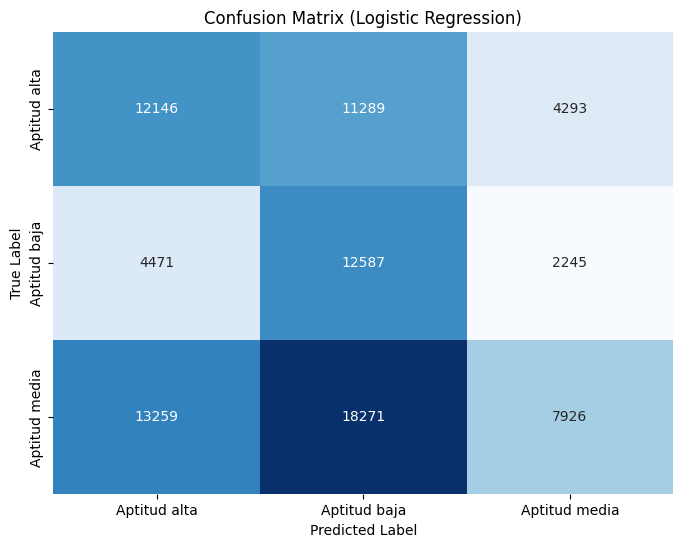

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))

# Remove 'aptitud_' prefix from labels
display_labels = [label.replace('aptitud_', '') for label in best_model.classes_]

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=display_labels, yticklabels=display_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

##RANDOM FOREST

In [ ]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
print("RandomForestClassifier initialized.")

RandomForestClassifier initialized.


In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20],
    'criterion': ['gini']
}
print("RandomForestClassifier parameter grid defined:")
print(param_grid_rf)


RandomForestClassifier parameter grid defined:
{'n_estimators': [50, 100, 150], 'max_depth': [10, 15, 20], 'criterion': ['gini']}


In [ ]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=cv, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters found for Random Forest:")
print(grid_search_rf.best_params_)
print("Best cross-validation accuracy score for Random Forest:")
print(grid_search_rf.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters found for Random Forest:
{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 50}
Best cross-validation accuracy score for Random Forest:
0.88661339683701


In [ ]:
# Get the best model from GridSearchCV
best_model_rf = grid_search_rf.best_estimator_

# Make predictions on the test set
y_pred = best_model_rf.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.4f}")

# Calculate and print the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy on the test set: 0.8846

Classification Report:
                        precision    recall  f1-score   support

 aptitud_Aptitud alta       0.88      0.87      0.88     27728
 aptitud_Aptitud baja       0.84      0.91      0.87     19303
aptitud_Aptitud media       0.91      0.88      0.90     39456

             accuracy                           0.88     86487
            macro avg       0.88      0.89      0.88     86487
         weighted avg       0.89      0.88      0.88     86487


Confusion Matrix:
 [[24209  1278  2241]
 [  742 17491  1070]
 [ 2637  2016 34803]]


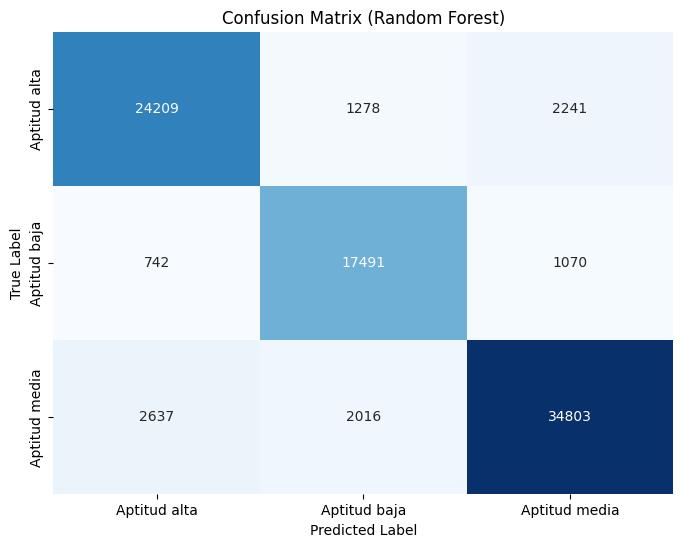

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))

# Remove 'aptitud_' prefix from labels
display_labels = [label.replace('aptitud_', '') for label in best_model_rf.classes_]

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=display_labels, yticklabels=display_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

##RED NEURONAL

In [ ]:
mlp_model = MLPClassifier(random_state=42, max_iter=500)
print("MLPClassifier initialized.")


MLPClassifier initialized.


In [ ]:
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001]
}
print("\nMLPClassifier parameter grid defined:")
print(param_grid_mlp)




MLPClassifier parameter grid defined:
{'hidden_layer_sizes': [(50,), (100,)], 'activation': ['relu'], 'solver': ['adam'], 'alpha': [0.0001, 0.001]}


In [ ]:
grid_search_mlp = GridSearchCV(estimator=mlp_model, param_grid=param_grid_mlp, cv=cv, scoring='accuracy', n_jobs=-1, verbose=3)
grid_search_mlp.fit(X_train, y_train)

print("\nBest parameters found for MLP:")
print(grid_search_mlp.best_params_)
print("Best cross-validation accuracy score for MLP:")
print(grid_search_mlp.best_score_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best parameters found for MLP:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Best cross-validation accuracy score for MLP:
0.6831811186990827


In [ ]:
# Get the best model from GridSearchCV
best_model_mlp = grid_search_mlp.best_estimator_

# Make predictions on the test set
y_pred = best_model_mlp.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.4f}")

# Calculate and print the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy on the test set: 0.6726

Classification Report:
                        precision    recall  f1-score   support

 aptitud_Aptitud alta       0.65      0.67      0.66     27728
 aptitud_Aptitud baja       0.66      0.57      0.61     19303
aptitud_Aptitud media       0.70      0.72      0.71     39456

             accuracy                           0.67     86487
            macro avg       0.67      0.66      0.66     86487
         weighted avg       0.67      0.67      0.67     86487


Confusion Matrix:
 [[18712  2051  6965]
 [ 2862 11039  5402]
 [ 7430  3604 28422]]


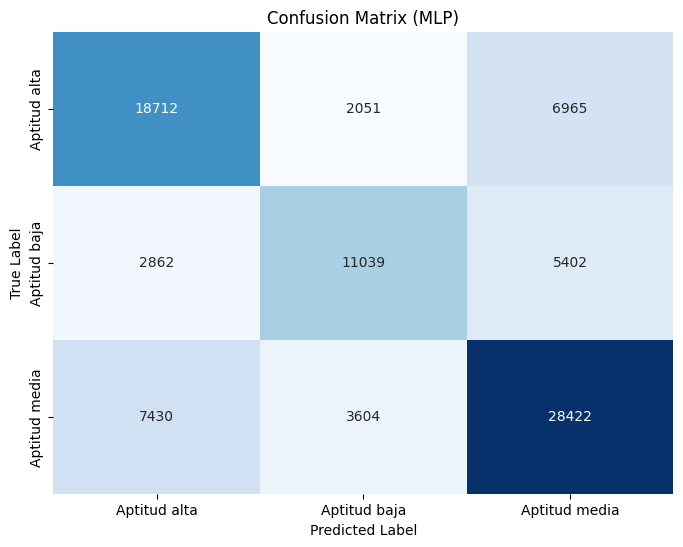

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))

# Remove 'aptitud_' prefix from labels
display_labels = [label.replace('aptitud_', '') for label in best_model_mlp.classes_]

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=display_labels, yticklabels=display_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (MLP)')
plt.show()

##XGBoost

Evaluando el modelo con validación cruzada...
  Fold 1/5
  F1-score para Fold 1: 0.8478
  Fold 2/5
  F1-score para Fold 2: 0.8400
  Fold 3/5
  F1-score para Fold 3: 0.8489
  Fold 4/5
  F1-score para Fold 4: 0.8470
  Fold 5/5
  F1-score para Fold 5: 0.8504

F1-score promedio en validación cruzada (5 folds): 0.8468
Desviación estándar del F1-score en validación cruzada: 0.0036

Entrenando modelo final en el conjunto completo de entrenamiento...
Entrenamiento final completado.

--- Evaluación del Modelo XGBoost en el Conjunto de Prueba ---
Accuracy en el conjunto de prueba: 0.8434
Precision ponderada en el conjunto de prueba: 0.8497
Recall ponderado en el conjunto de prueba: 0.8434
F1 ponderado en el conjunto de prueba: 0.8440
F1 macro en el conjunto de prueba: 0.8409

Reporte de Clasificación:
                        precision    recall  f1-score   support

 aptitud_Aptitud alta       0.82      0.85      0.84     27728
 aptitud_Aptitud baja       0.77      0.90      0.83     19303
aptitu

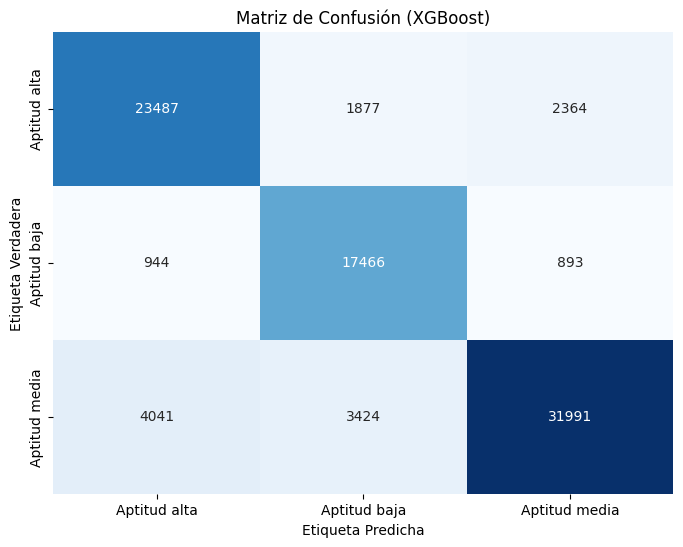

In [ ]:

le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

classes = np.unique(y_train_encoded)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train_encoded)
sample_weights = np.array([class_weights[label] for label in y_train_encoded])

xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=len(le.classes_),
    learning_rate=0.1,
    n_estimators=300,
    tree_method='hist',
    random_state=42,
    n_jobs=-1
)

print("Evaluando el modelo con validación cruzada...")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []

for fold, (train_index, val_index) in enumerate(cv.split(X_train, y_train_encoded)):
    print(f"  Fold {fold+1}/5")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold_encoded, y_val_fold_encoded = y_train_encoded[train_index], y_train_encoded[val_index]
    sample_weights_fold = sample_weights[train_index]

    model_fold = xgb.XGBClassifier(
        objective='multi:softprob',
        num_class=len(le.classes_),
        learning_rate=0.1,
        n_estimators=300,
        tree_method='hist',
        random_state=42,
        n_jobs=-1
    )
    model_fold.fit(X_train_fold, y_train_fold_encoded, sample_weight=sample_weights_fold)

    y_val_pred_encoded = model_fold.predict(X_val_fold)

    f1_fold = f1_score(y_val_fold_encoded, y_val_pred_encoded, average='weighted')
    f1_scores.append(f1_fold)
    print(f"  F1-score para Fold {fold+1}: {f1_fold:.4f}")

print(f"\nF1-score promedio en validación cruzada (5 folds): {np.mean(f1_scores):.4f}")
print(f"Desviación estándar del F1-score en validación cruzada: {np.std(f1_scores):.4f}")


print("\nEntrenando modelo final en el conjunto completo de entrenamiento...")
xgb_model.fit(X_train, y_train_encoded, sample_weight=sample_weights)
print("Entrenamiento final completado.")

y_pred_xgb_encoded = xgb_model.predict(X_test)

y_pred_xgb = le.inverse_transform(y_pred_xgb_encoded)

print("\n--- Evaluación del Modelo XGBoost en el Conjunto de Prueba ---")

accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb_encoded)
print(f"Accuracy en el conjunto de prueba: {accuracy_xgb:.4f}")
precision_weighted = precision_score(y_test, y_pred_xgb, average='weighted')
recall_weighted = recall_score(y_test, y_pred_xgb, average='weighted')
f1_weighted = f1_score(y_test, y_pred_xgb, average='weighted')
f1_macro = f1_score(y_test, y_pred_xgb, average='macro')


print(f"Precision ponderada en el conjunto de prueba: {precision_weighted:.4f}")
print(f"Recall ponderado en el conjunto de prueba: {recall_weighted:.4f}")
print(f"F1 ponderado en el conjunto de prueba: {f1_weighted:.4f}")
print(f"F1 macro en el conjunto de prueba: {f1_macro:.4f}")


class_report_xgb = classification_report(y_test, y_pred_xgb)
print("\nReporte de Clasificación:\n", class_report_xgb)

conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred_xgb_encoded)
print("\nMatriz de Confusión (Cruda):\n", conf_matrix_xgb)

plt.figure(figsize=(8, 6))

display_labels = [label.replace('aptitud_', '') for label in le.classes_]

sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=display_labels, yticklabels=display_labels)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión (XGBoost)')
plt.show()